In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [3]:

# --- 1. Load the cleaned dataset ---
file_path = '/Users/maribelgutierrezramirez/Desktop/proyecto5/equipo5_proyecto5/data/clean_data.csv'

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    print(df.head())
else:
    print(f"Error: The file was not found at this path: {file_path}")


File loaded successfully!
       country  year      status  life_expectancy  adult_mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   polio  total_expenditure  diphtheria  hiv/aids         gdp  populatio

In [4]:
# Crea una copia explícita del DataFrame para el año 2015
df_2015 = df[df['year'] == 2015].copy()

# Ahora puedes modificar df_2015 sin recibir el aviso
df_2015.drop('total_expenditure', axis=1, inplace=True)

In [5]:
# Selecciona solo las columnas numéricas para crear numerical_df_clean
numerical_df_clean = df.select_dtypes(include=['number'])

print(numerical_df_clean.head())

   year  life_expectancy  adult_mortality  infant_deaths  alcohol  \
0  2015             65.0            263.0             62     0.01   
1  2014             59.9            271.0             64     0.01   
2  2013             59.9            268.0             66     0.01   
3  2012             59.5            272.0             69     0.01   
4  2011             59.2            275.0             71     0.01   

   percentage_expenditure  hepatitis_b  measles   bmi  under_five_deaths  \
0               71.279624         65.0     1154  19.1                 83   
1               73.523582         62.0      492  18.6                 86   
2               73.219243         64.0      430  18.1                 89   
3               78.184215         67.0     2787  17.6                 93   
4                7.097109         68.0     3013  17.2                 97   

   polio  total_expenditure  diphtheria  hiv/aids         gdp  population  \
0    6.0               8.16        65.0       0.1  

In [6]:
# Crea una copia explícita del DataFrame para el año 2015
df_2015 = df[df['year'] == 2015].copy()

# Ahora puedes modificar df_2015 sin recibir el aviso
df_2015.drop('total_expenditure', axis=1, inplace=True)

In [7]:
# Crea una copia del DataFrame principal para el análisis de esperanza de vida
df_life = df.copy()

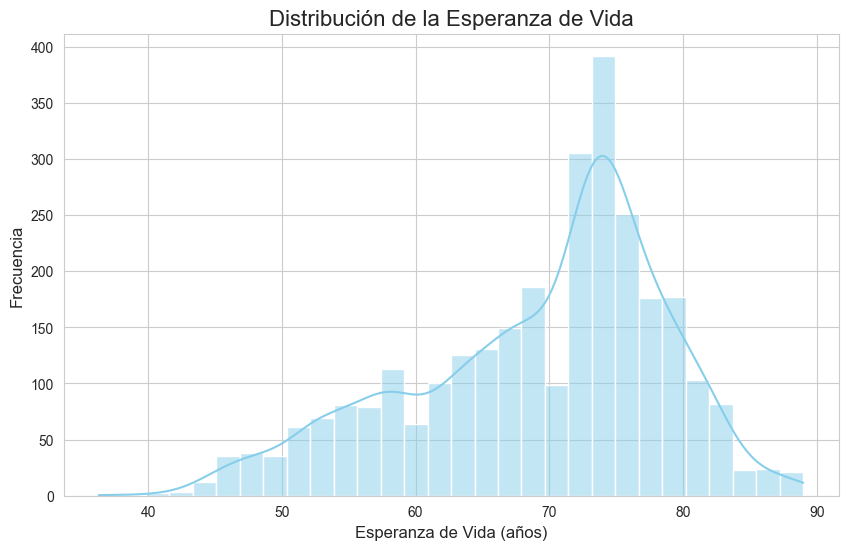

In [8]:
# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Crear el histograma de 'life_expectancy'
plt.figure(figsize=(10, 6))
sns.histplot(df_life['life_expectancy'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de la Esperanza de Vida', fontsize=16)
plt.xlabel('Esperanza de Vida (años)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

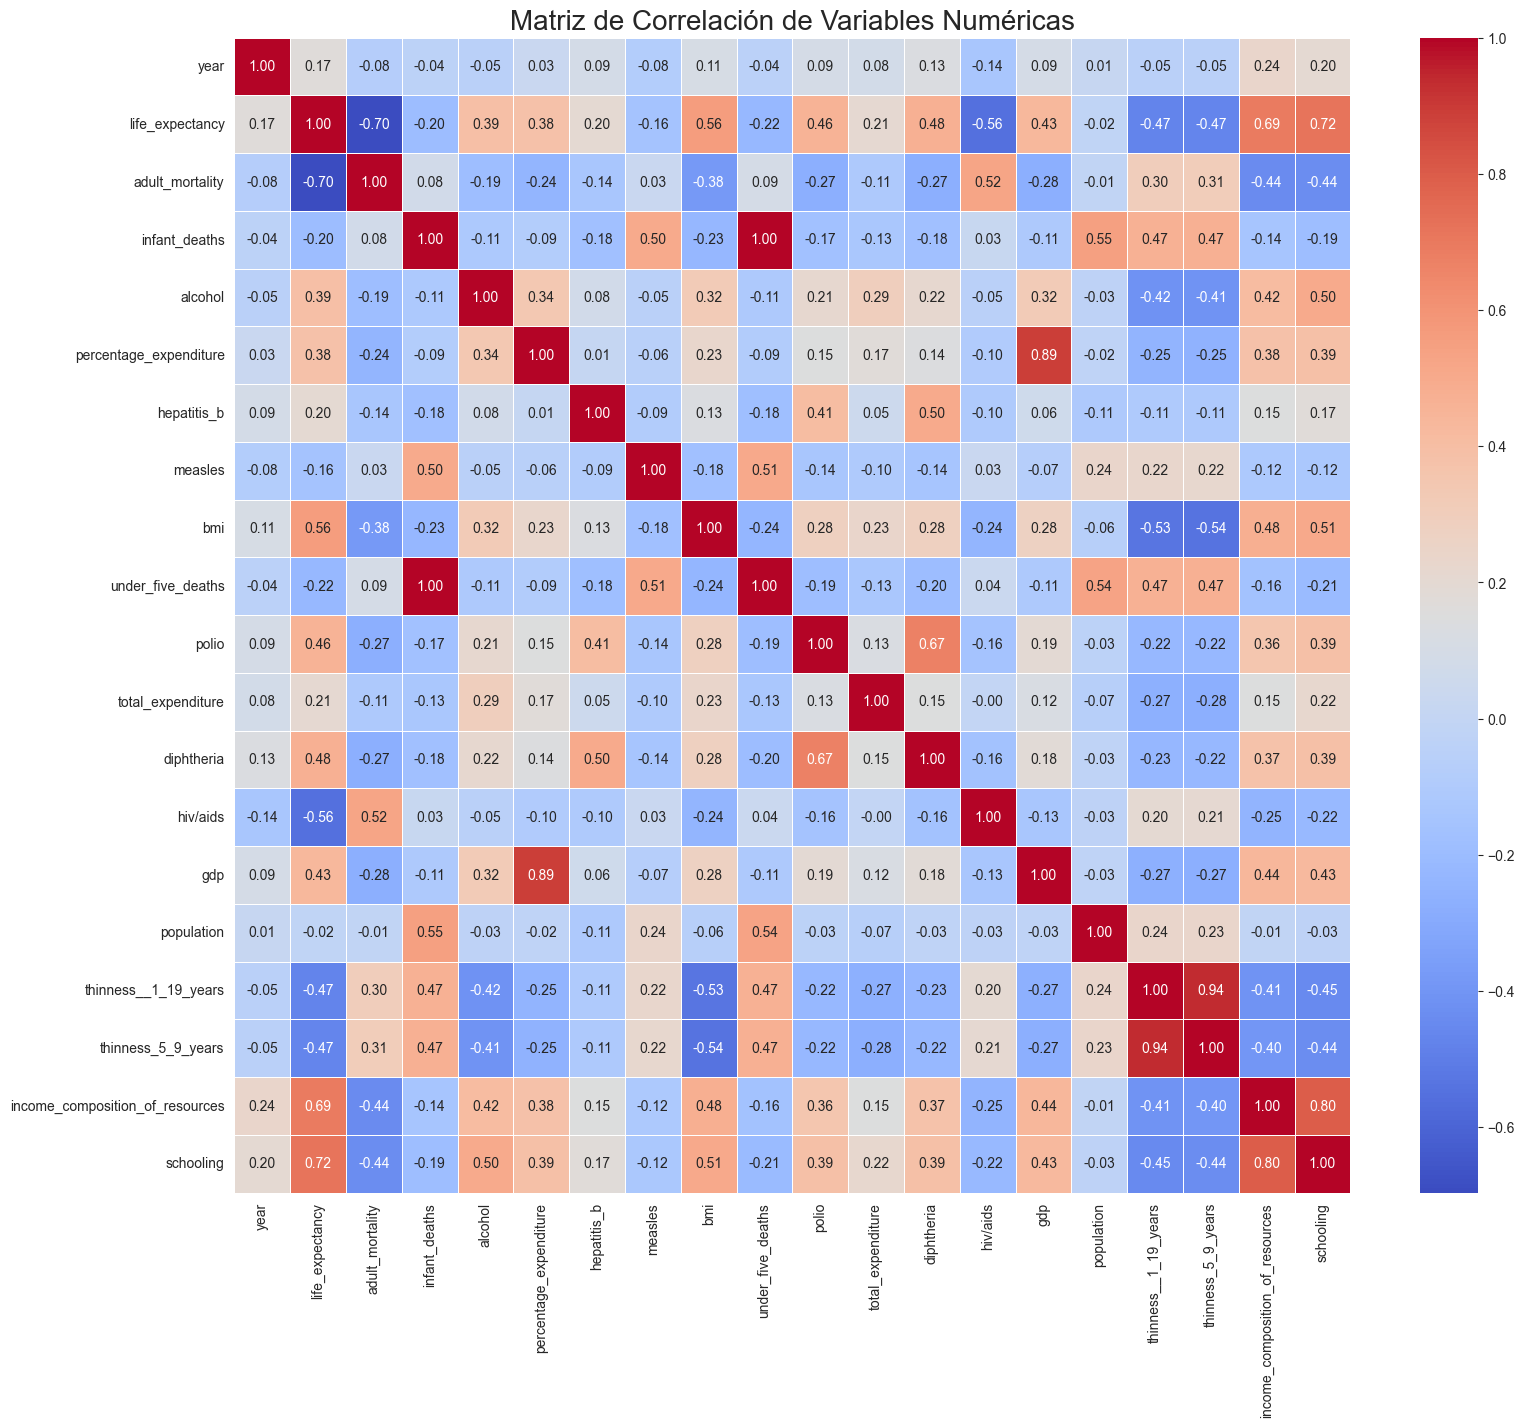

In [9]:
# Calcular la matriz de correlación
correlation_matrix = numerical_df_clean.corr()

# Crear el heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=20)
plt.show()

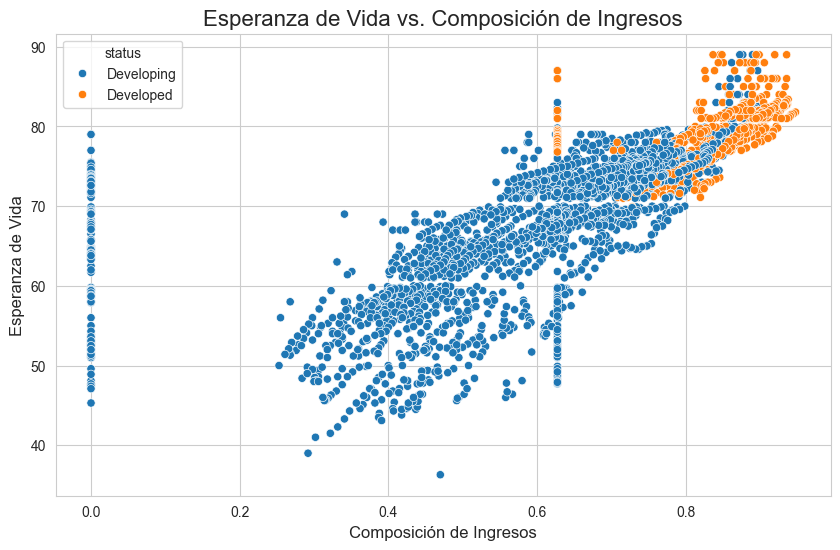

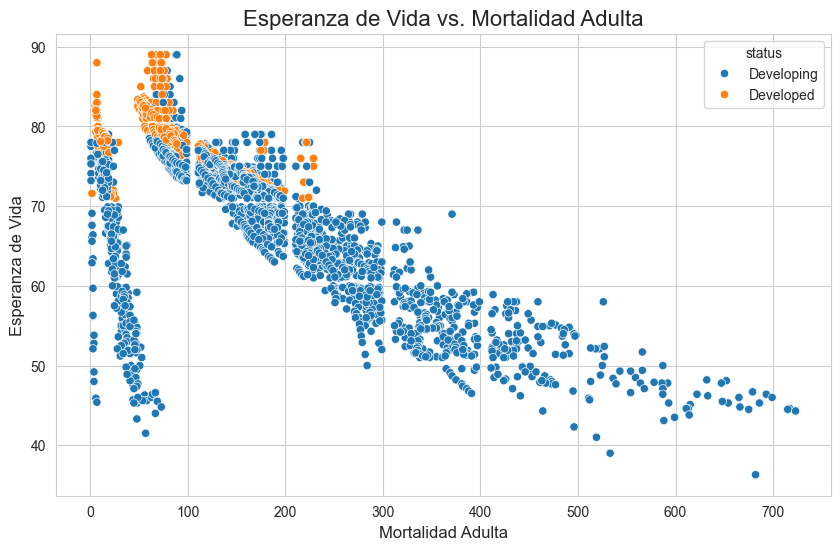

In [10]:
# Gráfico 1: Esperanza de Vida vs. Composición de Ingresos (alta correlación positiva)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_life, x='income_composition_of_resources', y='life_expectancy', hue='status')
plt.title('Esperanza de Vida vs. Composición de Ingresos', fontsize=16)
plt.xlabel('Composición de Ingresos', fontsize=12)
plt.ylabel('Esperanza de Vida', fontsize=12)
plt.show()

# Gráfico 2: Esperanza de Vida vs. Mortalidad Adulta (alta correlación negativa)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_life, x='adult_mortality', y='life_expectancy', hue='status')
plt.title('Esperanza de Vida vs. Mortalidad Adulta', fontsize=16)
plt.xlabel('Mortalidad Adulta', fontsize=12)
plt.ylabel('Esperanza de Vida', fontsize=12)
plt.show()

/var/folders/s_/d4b6mq3j6bd8xwqp4zh5c0540000gn/T/ipykernel_26003/217344297.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')


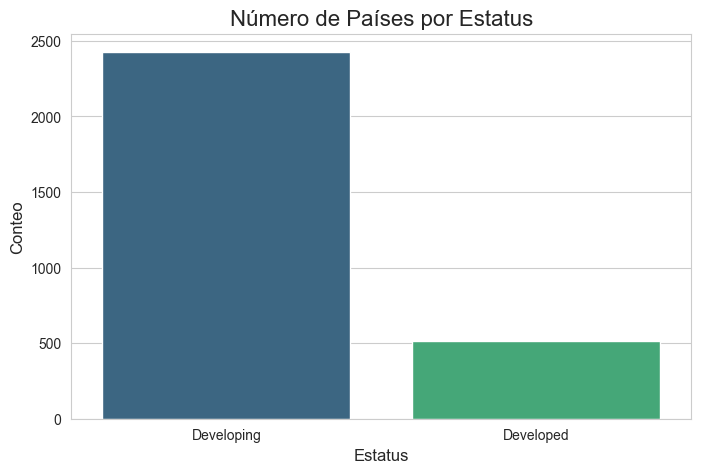

In [11]:
# Contar la frecuencia de los países por su 'status'
status_counts = df_life['status'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
plt.title('Número de Países por Estatus', fontsize=16)
plt.xlabel('Estatus', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.show()

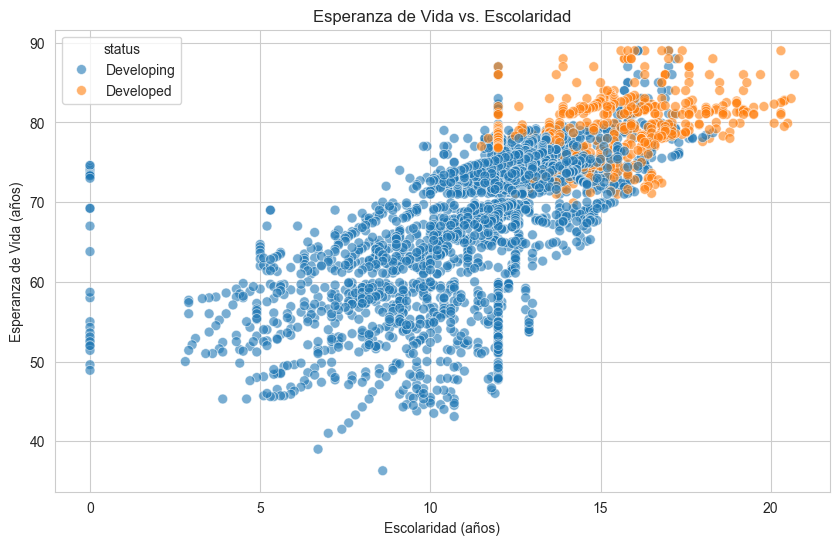

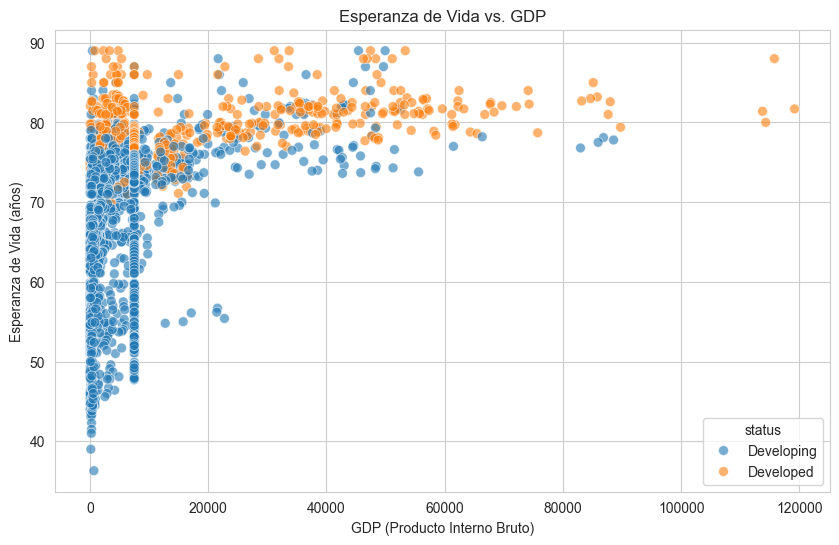

In [12]:
# Gráficos de dispersión para visualizar relaciones
# Relación entre "Esperanza de Vida" y "Escolaridad"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='schooling', y='life_expectancy', hue='status', data=df, s=50, alpha=0.6)
plt.title('Esperanza de Vida vs. Escolaridad')
plt.xlabel('Escolaridad (años)')
plt.ylabel('Esperanza de Vida (años)')
plt.grid(True)
plt.show()

# Relación entre "GDP" y "Esperanza de Vida"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp', y='life_expectancy', hue='status', data=df, s=50, alpha=0.6)
plt.title('Esperanza de Vida vs. GDP')
plt.xlabel('GDP (Producto Interno Bruto)')
plt.ylabel('Esperanza de Vida (años)')
plt.grid(True)
plt.show()



--- Matriz de Correlación (Pearson) ---

                                 life_expectancy  schooling       gdp  \
life_expectancy                         1.000000   0.715066  0.430493   
schooling                               0.715066   1.000000  0.429489   
gdp                                     0.430493   0.429489  1.000000   
income_composition_of_resources         0.692483   0.796207  0.440317   
adult_mortality                        -0.696359  -0.435108 -0.277053   

                                 income_composition_of_resources  \
life_expectancy                                         0.692483   
schooling                                               0.796207   
gdp                                                     0.440317   
income_composition_of_resources                         1.000000   
adult_mortality                                        -0.440062   

                                 adult_mortality  
life_expectancy                        -0.696359  
schoolin

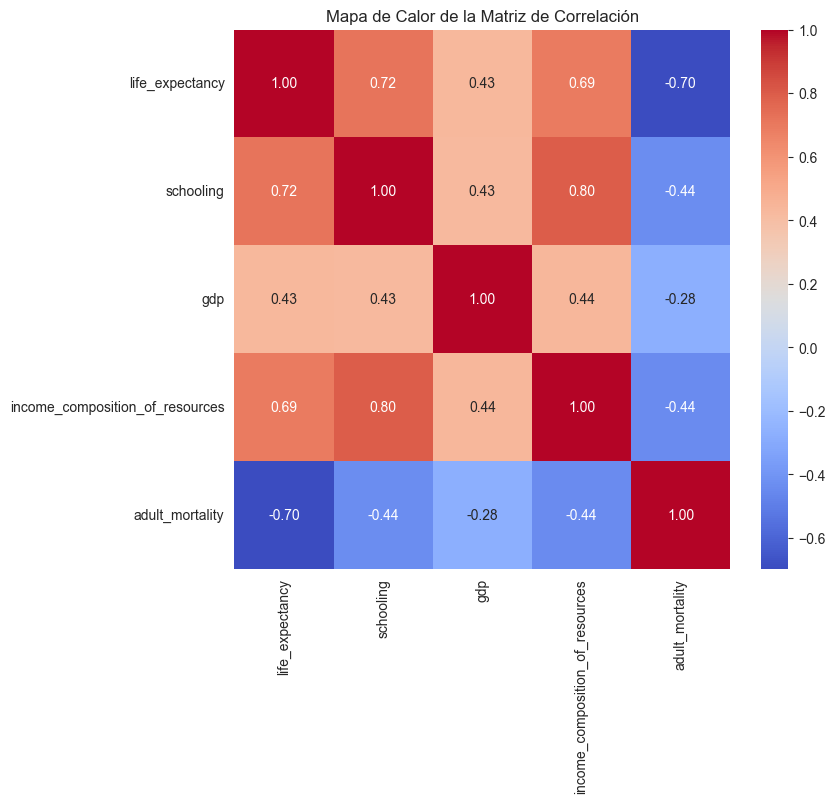

In [13]:
# Análisis de Correlación
print("\n--- Matriz de Correlación (Pearson) ---\n")
correlation_matrix = df[['life_expectancy', 'schooling', 'gdp', 'income_composition_of_resources', 'adult_mortality']].corr()
print(correlation_matrix)

# Visualización de la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

<Axes: xlabel='schooling', ylabel='life_expectancy'>

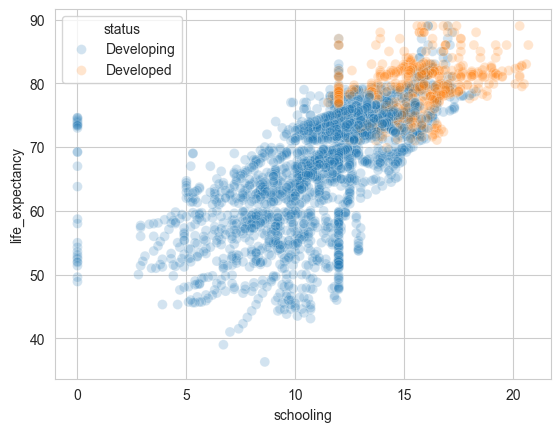

In [14]:
sns.scatterplot(x='schooling', y='life_expectancy', hue='status', data=df, s=50, alpha=0.2)

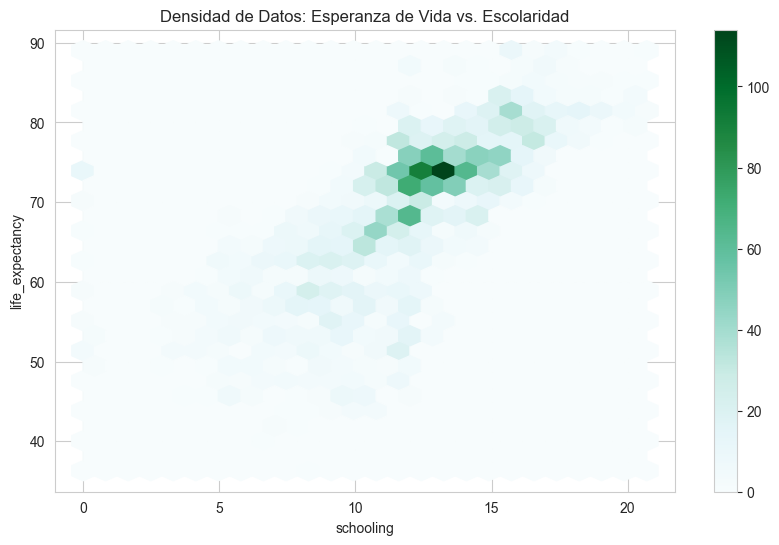

In [15]:
# Gráfico de hexbin 
df.plot.hexbin(x='schooling', y='life_expectancy', gridsize=25, figsize=(10, 6))
plt.title('Densidad de Datos: Esperanza de Vida vs. Escolaridad')
plt.show()

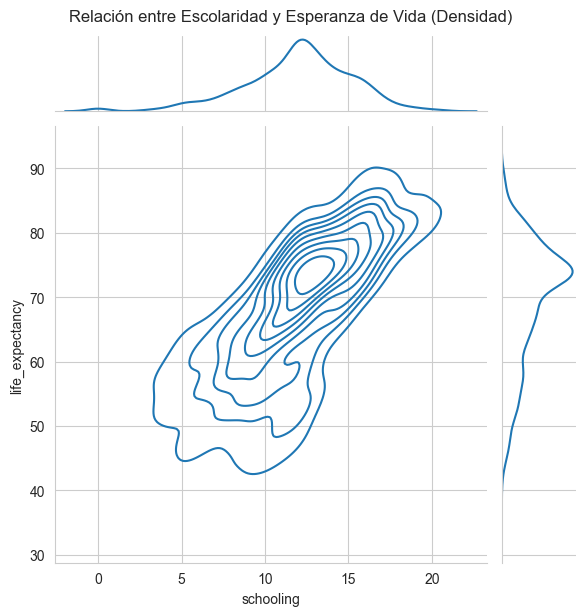

In [16]:
# Gráfico de densidad de KDE, la mejor opción para la mayoría de los casos
sns.jointplot(x='schooling', y='life_expectancy', data=df, kind='kde')
plt.suptitle('Relación entre Escolaridad y Esperanza de Vida (Densidad)', y=1.02)
plt.show()

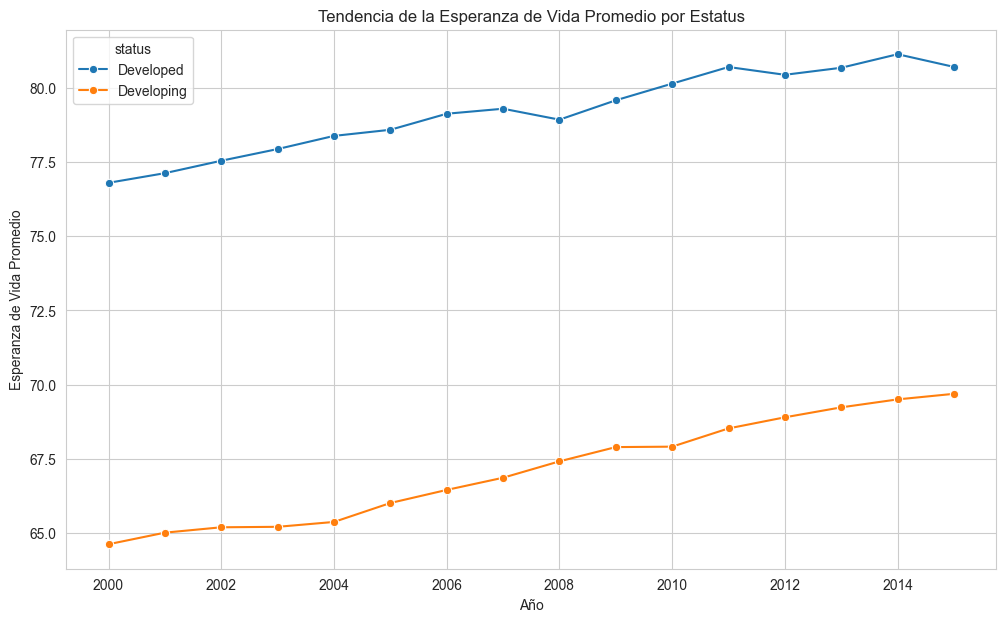

In [17]:
# Calcular la esperanza de vida promedio por año y estatus
avg_le_by_year_status = df.groupby(['year', 'status'])['life_expectancy'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(x='year', y='life_expectancy', hue='status', data=avg_le_by_year_status, marker='o')
plt.title('Tendencia de la Esperanza de Vida Promedio por Estatus')
plt.xlabel('Año')
plt.ylabel('Esperanza de Vida Promedio')
plt.grid(True)
plt.show()

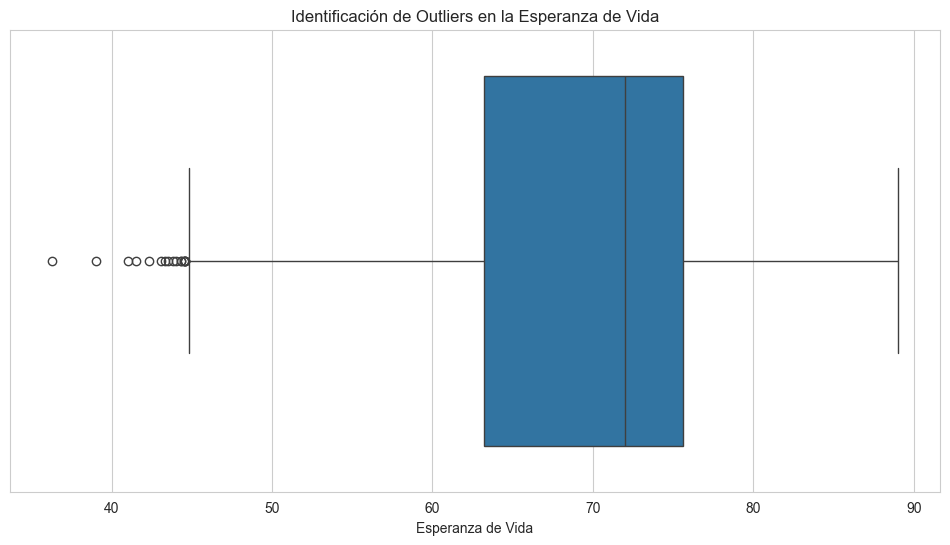

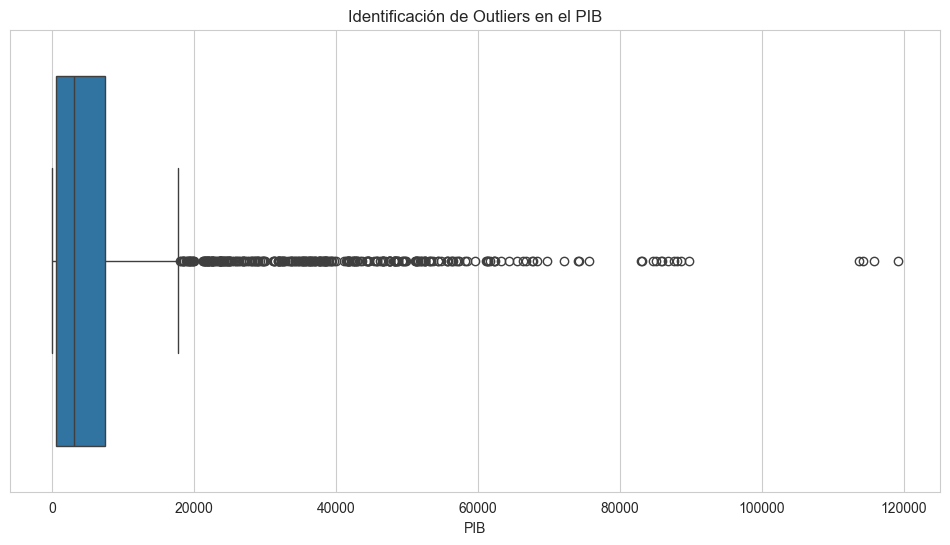

In [18]:
# Gráfico de caja (boxplot) para la esperanza de vida
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['life_expectancy'])
plt.title('Identificación de Outliers en la Esperanza de Vida')
plt.xlabel('Esperanza de Vida')
plt.show()

# Gráfico de caja para el PIB (GDP)
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['gdp'])
plt.title('Identificación de Outliers en el PIB')
plt.xlabel('PIB')
plt.show()

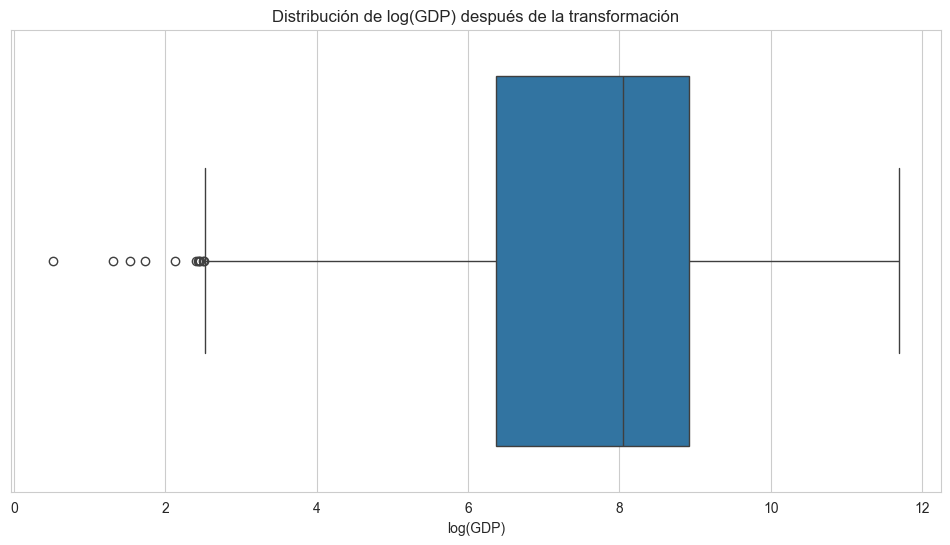

In [19]:
# Aplicar la transformación logarítmica al PIB para manejar los outliers
df['log_gdp'] = np.log(df['gdp'])

# Ahora, puedes ver la nueva distribución con otro gráfico de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['log_gdp'])
plt.title('Distribución de log(GDP) después de la transformación')
plt.xlabel('log(GDP)')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

# Seleccionar las variables (features) y el objetivo (target)
# Usaremos 'log_gdp' en lugar del 'gdp' original
features = df[['income_composition_of_resources', 'schooling', 'adult_mortality', 'log_gdp', 'status']]
target = df['life_expectancy']

# Convertir la variable 'status' en numérica
features = pd.get_dummies(features, columns=['status'], drop_first=True)

# Dividir los datos en 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Datos listos para el modelado.")

Datos listos para el modelado.


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Crear una instancia del modelo
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el R-squared para ver el rendimiento del modelo
r2 = r2_score(y_test, y_pred)
print(f"El coeficiente R^2 del modelo es: {r2:.2f}")

El coeficiente R^2 del modelo es: 0.72


In [23]:
# Muestra los coeficientes y el intercepto del modelo
print("Intercepto (b0):", model.intercept_)
print("Coeficientes (b1, b2...):", model.coef_)

# Para un resultado más claro, puedes combinar los nombres de las variables con sus coeficientes
feature_names = X_train.columns
coefficients = model.coef_

coefficients_df = pd.DataFrame({'Variable': feature_names, 'Coeficiente': coefficients})
print("\nContribución de cada variable a la predicción:")
print(coefficients_df)

Intercepto (b0): 57.012052986202775
Coeficientes (b1, b2...): [ 9.3598837   0.77067877 -0.03374531  0.56737948 -2.02835825]

Contribución de cada variable a la predicción:
                          Variable  Coeficiente
0  income_composition_of_resources     9.359884
1                        schooling     0.770679
2                  adult_mortality    -0.033745
3                          log_gdp     0.567379
4                status_Developing    -2.028358


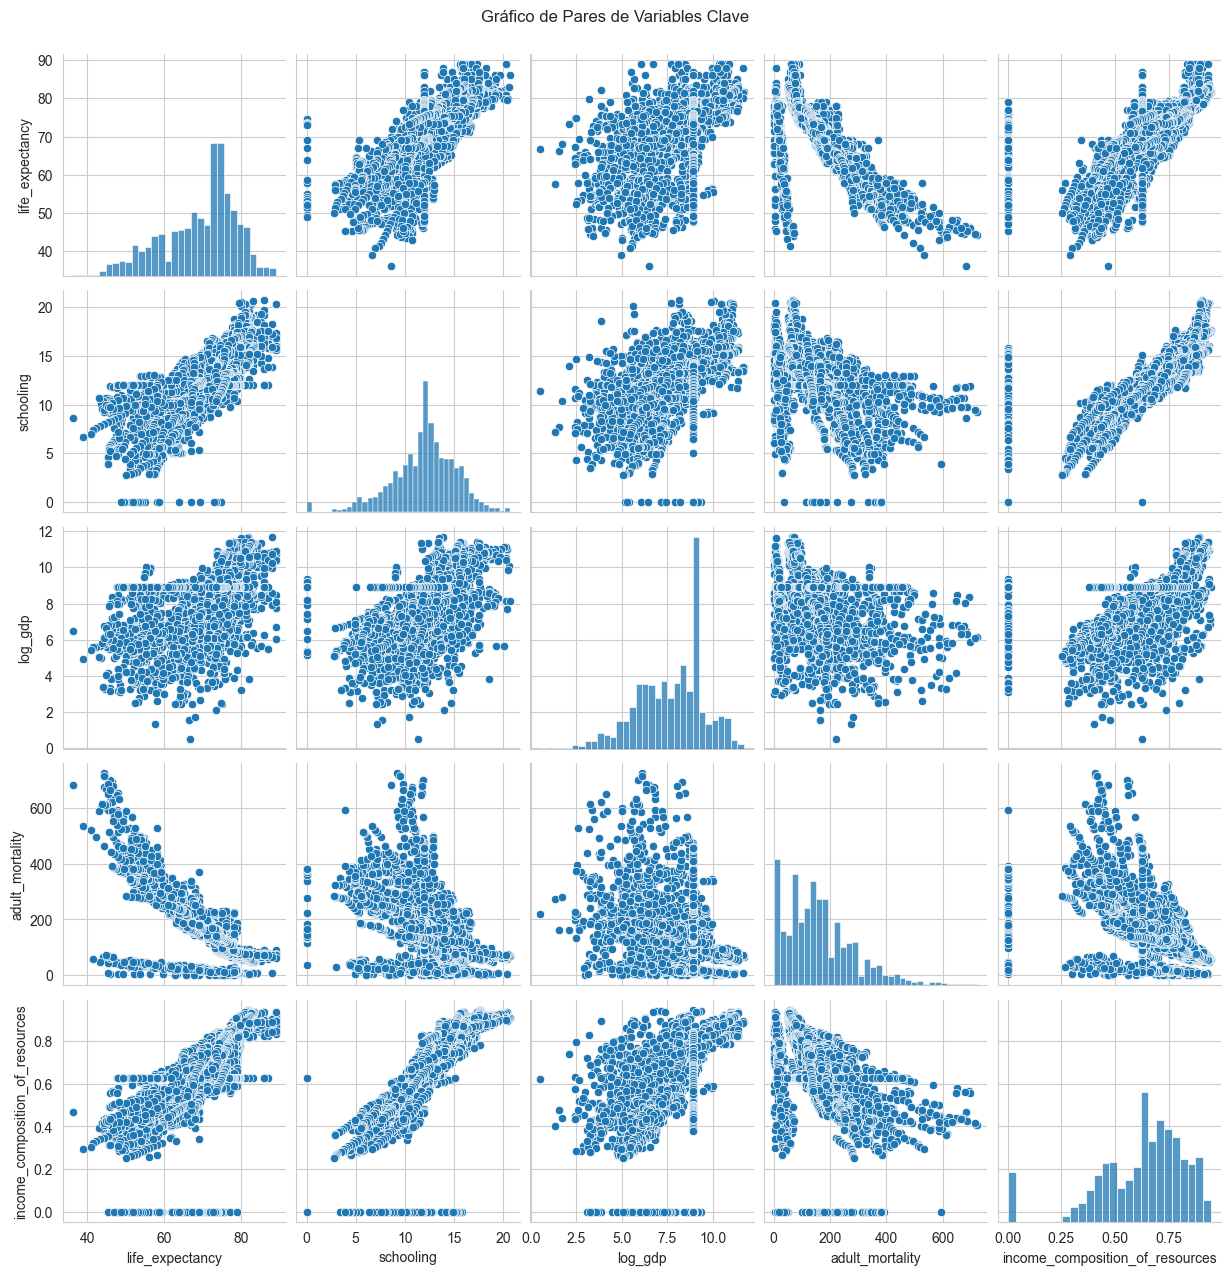

In [24]:
# Seleccionamos las variables clave para visualizar
variables_clave = ['life_expectancy', 'schooling', 'log_gdp', 'adult_mortality', 'income_composition_of_resources']

# Crear el pairplot
sns.pairplot(df[variables_clave])
plt.suptitle('Gráfico de Pares de Variables Clave', y=1.02)
plt.show()

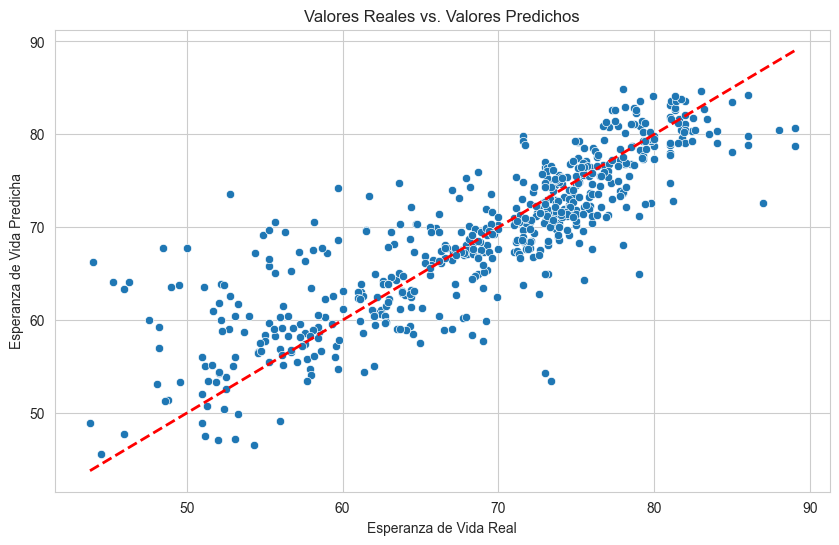

In [25]:
plt.figure(figsize=(10, 6))
# Gráfico de dispersión de los valores reales (y_test) vs. los predichos (y_pred)
sns.scatterplot(x=y_test, y=y_pred)
# Agregar la línea diagonal perfecta (donde la predicción es igual al valor real)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('Valores Reales vs. Valores Predichos')
plt.xlabel('Esperanza de Vida Real')
plt.ylabel('Esperanza de Vida Predicha')
plt.show()